In [2]:
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [5]:
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D

In [7]:
from tensorflow.keras.optimizers import Adam

In [8]:
from tensorflow.keras.metrics import categorical_crossentropy

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
import itertools

In [14]:
import os

In [15]:
import shutil

In [16]:
import random

In [17]:
import glob

In [18]:
import matplotlib.pyplot as plt

In [19]:
import warnings

In [22]:
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Now come to the actual code

In [35]:
#Orgnize data into train, test, and validation directories
os.chdir('C:/Users/Ayaz khan/Desktop/venvir/Tensorflow fake face detection/real-vs-fake')

In [37]:
if os.path.isdir('train/fake') is False:
    os.makedirs('train/fake')
    os.makedirs('train/real')
    os.makedirs('valid/fake')
    os.makedirs('valid/real')
    os.makedirs('test/fake')
    os.makedirs('test/real')

In [47]:
for c in random.sample(glob.glob('fake*'), 500):
    shutil.move(c, 'train/fake' )
for c in random.sample(glob.glob('real*'), 500):
    shutil.move(c, 'train/real' )
for c in random.sample(glob.glob('fake*'), 100):
    shutil.move(c, 'valid/fake' )
for c in random.sample(glob.glob('real*'), 100):
    shutil.move(c, 'valid/real' )
for c in random.sample(glob.glob('fake*'), 50):
    shutil.move(c, 'test/fake' )
for c in random.sample(glob.glob('real*'), 50):
    shutil.move(c, 'test/real' )

In [48]:
os.chdir('../../')

In [49]:
os.getcwd()

'C:\\Users\\Ayaz khan\\Desktop\\venvir'

In [50]:
os.chdir('C:/Users/Ayaz khan/Desktop/venvir/Tensorflow fake face detection/real-vs-fake')

In [51]:
os.getcwd()

'C:\\Users\\Ayaz khan\\Desktop\\venvir\\Tensorflow fake face detection\\real-vs-fake'

In [52]:
os.chdir('../../')

In [53]:
os.getcwd()

'C:\\Users\\Ayaz khan\\Desktop\\venvir'

In [54]:
os.chdir('C:/Users/Ayaz khan/Desktop/venvir/Tensorflow fake face detection/real-vs-fake/train')

In [55]:
os.getcwd()

'C:\\Users\\Ayaz khan\\Desktop\\venvir\\Tensorflow fake face detection\\real-vs-fake\\train'

In [56]:
train_path = 'C:/Users/Ayaz khan/Desktop/venvir/Tensorflow fake face detection/real-vs-fake/train'
valid_path = 'C:/Users/Ayaz khan/Desktop/venvir/Tensorflow fake face detection/real-vs-fake/valid'
test_path = 'C:/Users/Ayaz khan/Desktop/venvir/Tensorflow fake face detection/real-vs-fake/test'

In [78]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, batch_size=10, target_size=(224,224), classes=['fake', 'real']  )
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['fake', 'real'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['fake', 'real'],shuffle=False, batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [79]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

In [80]:
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes ==2

In [81]:
imgs, labels = next(train_batches)

In [82]:
#writing a function to plot images and its corresponding labels.

In [102]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

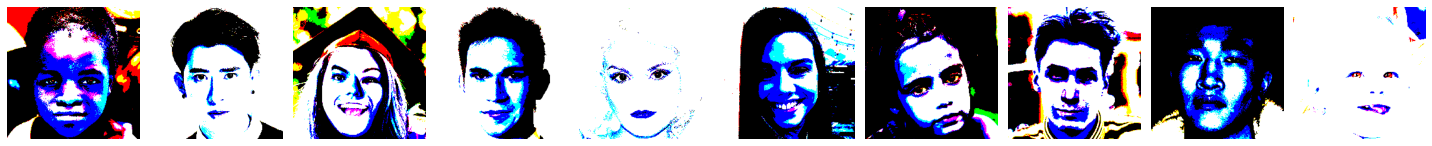

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [103]:
plotImages(imgs)
print(labels)

# building sequential model

In [106]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
]) 

In [108]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [111]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [116]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [117]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape() .as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape() .as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable+params}

In [118]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [119]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [120]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [121]:
for layer in model.layers:
    layer.trainable = False

In [122]:
model.add(Dense(units=2, activation='softmax'))

In [123]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [124]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=3, verbose=2)

Epoch 1/3
100/100 - 1955s - loss: 0.8352 - accuracy: 0.5080 - val_loss: 0.8061 - val_accuracy: 0.5300
Epoch 2/3


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
test_batches.classes

In [ ]:
cm = confusion_matrix(y_true=true_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['fake', 'real']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')